In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os

# Path to your dataset directory
data_dir = r'C:\Users\prajw\OneDrive\Desktop\skin_burn_classification\data'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')

# Print the paths to verify
print(f"Training directory: {train_dir}")
print(f"Validation directory: {val_dir}")

# Parameters for image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Flow validation images in batches of 32 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Print number of images in each generator
print(f"Number of training images: {train_generator.samples}")
print(f"Number of validation images: {val_generator.samples}")

# Convert generators to tf.data.Dataset
train_dataset = tf.data.Dataset.from_generator(lambda: train_generator, 
                                               output_signature=(tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
                                                                 tf.TensorSpec(shape=(None, train_generator.num_classes), dtype=tf.float32))).repeat()
val_dataset = tf.data.Dataset.from_generator(lambda: val_generator, 
                                             output_signature=(tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
                                                               tf.TensorSpec(shape=(None, val_generator.num_classes), dtype=tf.float32))).repeat()

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom top layers for your classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Set steps_per_epoch and validation_steps
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

# Train the model
model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=val_dataset,
    validation_steps=validation_steps
)

# Save the trained model
model.save('skin_burn_classification_model.h5')


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os

# Path to your dataset directory
data_dir = r'C:\Users\prajw\OneDrive\Desktop\skin_burn_classification\data'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')

# Print the paths to verify
print(f"Training directory: {train_dir}")
print(f"Validation directory: {val_dir}")

# Parameters for image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Flow validation images in batches of 32 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Convert DirectoryIterator to TensorFlow Dataset
def generator_to_dataset(generator):
    output_signature = (
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, generator.num_classes), dtype=tf.float32)
    )
    return tf.data.Dataset.from_generator(lambda: generator, output_signature=output_signature).repeat()

train_dataset = generator_to_dataset(train_generator)
val_dataset = generator_to_dataset(val_generator)

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom top layers for your classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_dataset,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_dataset,
    validation_steps=len(val_generator)
)

# Create a directory for the model if it does not exist
model_dir = os.path.join(data_dir, 'model')
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'skin_burn_classification_model.keras')

# Save the trained model
model.save(model_path)
print(f"Model saved to {model_path}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import os
import shutil
import matplotlib.pyplot as plt

# Path to your dataset directory
data_dir = r'C:\Users\prajw\OneDrive\Desktop\skin_burn_classification\data'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')

# Print the paths to verify
print(f"Training directory: {train_dir}")
print(f"Validation directory: {val_dir}")

# Parameters for image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Flow validation images in batches of 32 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Convert DirectoryIterator to TensorFlow Dataset with repeat
def generator_to_dataset(generator):
    output_signature = (
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, generator.num_classes), dtype=tf.float32)
    )
    return tf.data.Dataset.from_generator(lambda: generator, output_signature=output_signature).repeat()

train_dataset = generator_to_dataset(train_generator)
val_dataset = generator_to_dataset(val_generator)

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom top layers for your classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the history
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_dataset,
    validation_steps=len(val_generator)
)

# Check if the model directory exists
model_dir = os.path.join(data_dir, 'model')
if os.path.exists(model_dir):
    # Rename the existing model directory
    new_model_dir = os.path.join(data_dir, 'model_old')
    if os.path.exists(new_model_dir):
        shutil.rmtree(new_model_dir)
    os.rename(model_dir, new_model_dir)

# Create the new model directory
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'skin_burn_classification_model.keras')
model.save(model_path)
print(f"Model saved to {model_path}")

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Training directory: C:\Users\prajw\OneDrive\Desktop\skin_burn_classification\data\train
Validation directory: C:\Users\prajw\OneDrive\Desktop\skin_burn_classification\data\validation
Found 3622 images belonging to 4 classes.
Found 906 images belonging to 4 classes.
Epoch 1/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1334s 11s/step - accuracy: 0.5945 - loss: 1.1928 - val_accuracy: 0.2528 - val_loss: 1.5791 - learning_rate: 0.0010
Epoch 2/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1426s 12s/step - accuracy: 0.7182 - loss: 0.6946 - val_accuracy: 0.2472 - val_loss: 1.7870 - learning_rate: 0.0010
Epoch 3/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1343s 12s/step - accuracy: 0.7411 - loss: 0.6409 - val_accuracy: 0.2472 - val_loss: 1.7878 - learning_rate: 0.0010
Epoch 4/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 1362s 12s/step - accuracy: 0.7508 - loss: 0.6378 - val_accuracy: 0.2472 - val_loss: 1.9753 - learning_rate: 0.0010
Epoch 5/30
114/114 ━━━━━━━━━━━━━━━━━━━━ 2232s 20s/step - accuracy: 0.7684 - loss: 0.6141 - val_accuracy: 0.2472 - 

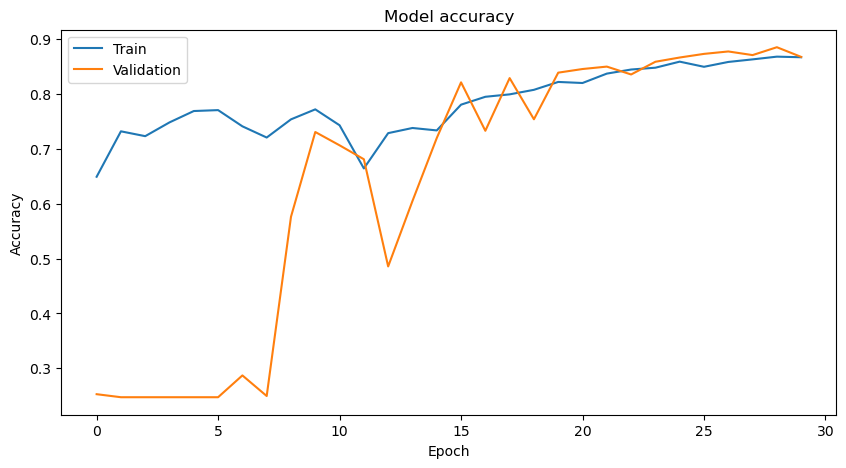

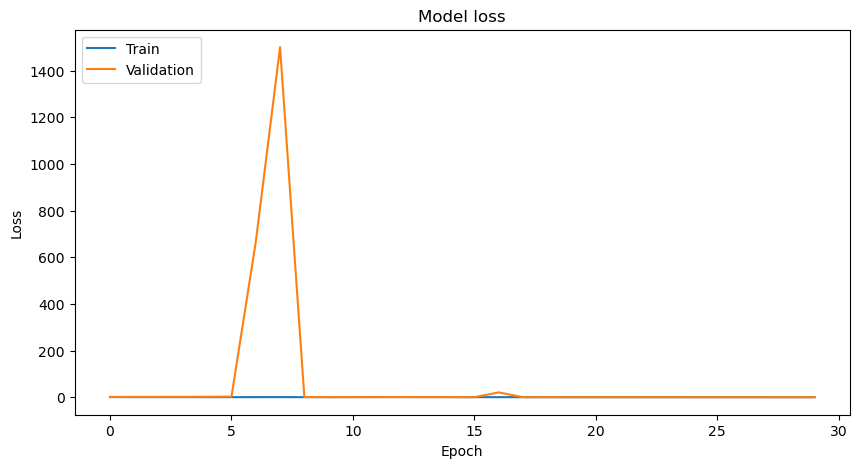

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import os
import shutil
import matplotlib.pyplot as plt

# Path to your dataset directory
data_dir = r'C:\Users\prajw\OneDrive\Desktop\skin_burn_classification\data'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')

# Print the paths to verify
print(f"Training directory: {train_dir}")
print(f"Validation directory: {val_dir}")

# Parameters for image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2]
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Flow validation images in batches of 32 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Convert generators to datasets and apply repeat()
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, train_generator.num_classes), dtype=tf.float32)
    )
).repeat()

val_dataset = tf.data.Dataset.from_generator(
    lambda: val_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, val_generator.num_classes), dtype=tf.float32)
    )
).repeat()

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom top layers for your classification task with regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 5:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

lr_callback = LearningRateScheduler(scheduler)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model checkpoint
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model and capture the history
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_generator),
    epochs=30,  # Increased epochs for better training
    validation_data=val_dataset,
    validation_steps=len(val_generator),
    shuffle=True,  # Shuffle the data at the beginning of each epoch
    callbacks=[early_stopping, lr_callback, model_checkpoint]
)

# Check if the model directory exists
model_dir = os.path.join(data_dir, 'model')
if os.path.exists(model_dir):
    # Rename the existing model directory
    new_model_dir = os.path.join(data_dir, 'model_old')
    if os.path.exists(new_model_dir):
        shutil.rmtree(new_model_dir)
    os.rename(model_dir, new_model_dir)

# Create the new model directory
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'skin_burn_classification_model.keras')
model.save(model_path)
print(f"Model saved to {model_path}")

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Training directory: C:\Users\prajw\OneDrive\Desktop\skin_burn_classification\data\train
Validation directory: C:\Users\prajw\OneDrive\Desktop\skin_burn_classification\data\validation
Found 3622 images belonging to 4 classes.
Found 906 images belonging to 4 classes.
Epoch 1/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 1089s 9s/step - accuracy: 0.5524 - loss: 1.4057 - val_accuracy: 0.2472 - val_loss: 3.7649 - learning_rate: 0.0010
Epoch 2/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 1043s 9s/step - accuracy: 0.6615 - loss: 0.9131 - val_accuracy: 0.2472 - val_loss: 2.5546 - learning_rate: 0.0010
Epoch 3/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 1068s 9s/step - accuracy: 0.6394 - loss: 0.9083 - val_accuracy: 0.2472 - val_loss: 7.8273 - learning_rate: 0.0010
Epoch 4/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 1058s 9s/step - accuracy: 0.6840 - loss: 0.7729 - val_accuracy: 0.2472 - val_loss: 2.9086 - learning_rate: 0.0010
Epoch 5/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 1054s 9s/step - accuracy: 0.6783 - loss: 0.7868 - val_accuracy: 0.2539 - val_l

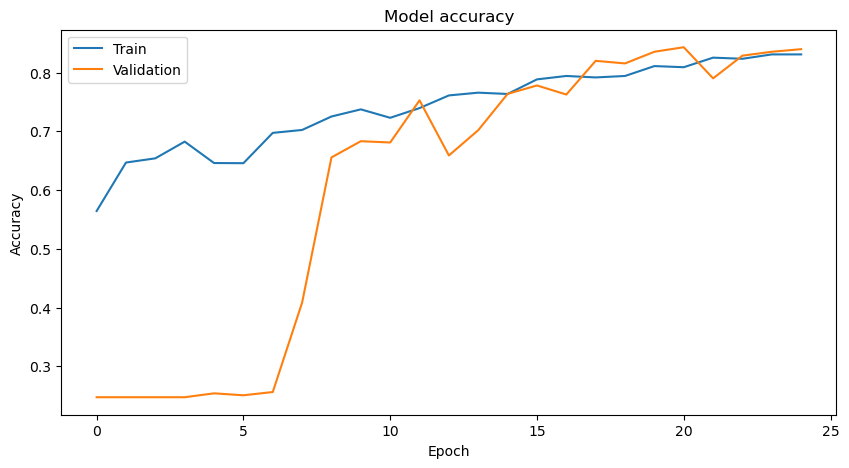

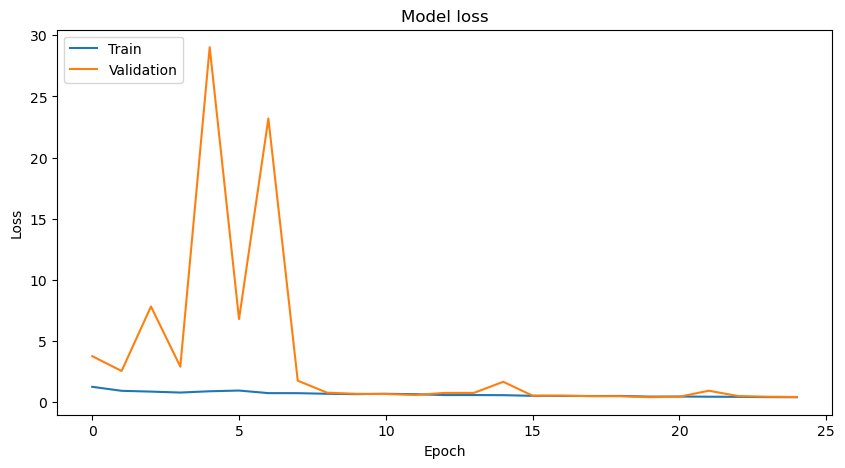

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import os
import shutil
import matplotlib.pyplot as plt

# Path to your dataset directory
data_dir = r'C:\Users\prajw\OneDrive\Desktop\skin_burn_classification\data'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')

# Print the paths to verify
print(f"Training directory: {train_dir}")
print(f"Validation directory: {val_dir}")

# Parameters for image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.8, 1.2]
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Flow validation images in batches of 32 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Convert generators to datasets and apply repeat()
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, train_generator.num_classes), dtype=tf.float32)
    )
).repeat()

val_dataset = tf.data.Dataset.from_generator(
    lambda: val_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, val_generator.num_classes), dtype=tf.float32)
    )
).repeat()

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom top layers for your classification task with regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 5:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1))

lr_callback = LearningRateScheduler(scheduler)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model checkpoint
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model and capture the history
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_generator),
    epochs=25,  # Increased epochs for better training
    validation_data=val_dataset,
    validation_steps=len(val_generator),
    shuffle=True,  # Shuffle the data at the beginning of each epoch
    callbacks=[early_stopping, lr_callback, model_checkpoint]
)

# Check if the model directory exists
model_dir = os.path.join(data_dir, 'model')
if os.path.exists(model_dir):
    # Rename the existing model directory
    new_model_dir = os.path.join(data_dir, 'model_old')
    if os.path.exists(new_model_dir):
        shutil.rmtree(new_model_dir)
    os.rename(model_dir, new_model_dir)

# Create the new model directory
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'skin_burn_classification_model.keras')
model.save(model_path)
print(f"Model saved to {model_path}")

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ModelCheckpoint
import os
import shutil
import matplotlib.pyplot as plt

# Path to your dataset directory
data_dir = r'C:\Users\prajw\OneDrive\Desktop\skin_burn_classification\data'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')

# Print the paths to verify
print(f"Training directory: {train_dir}")
print(f"Validation directory: {val_dir}")

# Parameters for image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,  # Increased rotation range
    width_shift_range=0.3,  # Increased shift range
    height_shift_range=0.3,  # Increased shift range
    brightness_range=[0.6, 1.4]  # Expanded brightness range
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Flow validation images in batches of 32 using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Convert generators to datasets and apply repeat()
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, train_generator.num_classes), dtype=tf.float32)
    )
).repeat()

val_dataset = tf.data.Dataset.from_generator(
    lambda: val_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, val_generator.num_classes), dtype=tf.float32)
    )
).repeat()

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom top layers for your classification task with regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 5:
        return float(lr)
    else:
        return float(lr * 0.95)  # Adjusted decay rate

lr_callback = LearningRateScheduler(scheduler)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model checkpoint
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Train the model and capture the history
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_generator),
    epochs=25,  # Increased epochs for better training
    validation_data=val_dataset,
    validation_steps=len(val_generator),
    shuffle=True,  # Shuffle the data at the beginning of each epoch
    callbacks=[early_stopping, lr_callback, model_checkpoint]
)

# Check if the model directory exists
model_dir = os.path.join(data_dir, 'model')
if os.path.exists(model_dir):
    # Rename the existing model directory
    new_model_dir = os.path.join(data_dir, 'model_old')
    if os.path.exists(new_model_dir):
        shutil.rmtree(new_model_dir)
    os.rename(model_dir, new_model_dir)

# Create the new model directory
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, 'skin_burn_classification_model.keras')
model.save(model_path)
print(f"Model saved to {model_path}")

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Training directory: C:\Users\prajw\OneDrive\Desktop\skin_burn_classification\data\train
Validation directory: C:\Users\prajw\OneDrive\Desktop\skin_burn_classification\data\validation
Found 3622 images belonging to 4 classes.
Found 906 images belonging to 4 classes.
Epoch 1/25
 11/114 ━━━━━━━━━━━━━━━━━━━━ 23:12 14s/step - accuracy: 0.5056 - loss: 1.7412